In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

# **2 - Perceptron**

# 2.1



In [19]:
drive.mount('/content/drive')

Mounted at /content/drive


In [263]:
Q2_FILE_PATH = '/content/drive/MyDrive/University/nn/perceptron.csv'

In [264]:
perceptron_raw_data = pd.read_csv(Q2_FILE_PATH)

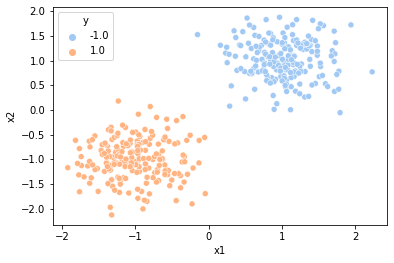

In [265]:
sns.scatterplot(data=perceptron_raw_data, x='x1', y='x2', hue='y', palette='pastel')

# 2.2

In [266]:
perceptron_train_data, perceptron_test_data = train_test_split(perceptron_raw_data, random_state=41, test_size=0.25)
print(perceptron_train_data.shape)
print(perceptron_test_data.shape)

(300, 3)
(100, 3)


In [717]:
class Neuron:
  def __init__(self, train_inputs, train_targets, test_inputs, test_targets, activation_func, weight_updating_func, find_line_func, cost_func, check_end_func, threshold = 0, learning_rate = 0, random_initial=False, error_threshold=0):
    self.inputs_num = train_inputs.shape[0]
    self.train_records_num = train_inputs.shape[1]
    self.weights = [random.random() for i in range(train_inputs.shape[0])] if random_initial else np.zeros(train_inputs.shape[0])
    self.bias = random_initial if random.random() else 0
    self.train_inputs = train_inputs
    self.train_targets = train_targets
    self.test_inputs = test_inputs
    self.test_targets = test_targets
    self.activation_func = activation_func
    self.weight_updating_func = weight_updating_func
    self.threshold = threshold
    self.learning_rate = learning_rate
    self.find_line_func = find_line_func
    self.cost_func = cost_func
    self.error_threshold = error_threshold
    self.check_end_func = check_end_func
  
  def train(self, max_epochs = 10):
    for epoch in range(0, max_epochs):
      print('...<<< epoch %d started >>>...'%epoch)
      errors_num = 0
      updates_num = 0
      for record_num in range(0, self.train_records_num):
        x = self.train_inputs.T[record_num]
        net = np.dot(x, self.weights) + self.bias
        h = self.activation_func(np.array([net]), self.threshold)[0]
        t = self.train_targets[record_num]
        e = self.cost_func(t, h, net)
        # print('...<<< x1 = %f, x2 = %f, h = %d, t = %d, e = %d >>>...'%(x[0], x[1], h, t, e))
        self.weights, self.bias, update_num = self.weight_updating_func(w=self.weights, x=x, b=self.bias, t=t, net=net, alpha=self.learning_rate, e=e)
        updates_num += update_num
        if e > self.error_threshold: 
          errors_num += 1
      print('...<<< epoch %d ended with %d errors >>>...'%(epoch, errors_num))
      if self.check_end_func(errors_num, updates_num) :
        break
    print('...<<< accuracy is: %d >>>...'%((1 - errors_num/self.train_records_num)*100))
    return self.weights, self.bias

  def test(self):
    nets = np.dot(self.test_inputs.T, self.weights) + self.bias
    outputs = self.activation_func(nets, self.threshold)
    accuracy = len(outputs[outputs == self.test_targets]) / len(self.test_targets)
    return accuracy
    
  def show_result(self, df):
    lines_y = self.find_line_func(self.weights, self.train_inputs, self.bias, self.threshold)
    for y in lines_y: 
      sns.lineplot(x=self.train_inputs[0], y=y, color='black')
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='pastel')

  def reset(self, threshold, learning_rate=0.1):
    self.weights = np.zeros(self.train_inputs.shape[0])
    self.bias = 0
    self.threshold = threshold
    self.learning_rate = learning_rate
  
  def madaline_initial_weights(self, adaline_num, seed):
    np.random.seed(seed)
    self.weights = np.random.normal(size=(adaline_num, self.train_inputs.shape[0])).T
    self.bias = np.random.normal(size=adaline_num)



In [268]:
def perceptron_weight_updating_func(w, x, b, t, net, alpha, e):
  if e != 0:
    w += alpha * x * t
    b += alpha * t
  return w, b, 0

In [269]:
def perceptron_activation_func(net, threshold):
  h = np.zeros(net.shape[0])
  h[net > threshold] = 1
  h[net < -1*threshold] = -1
  return h

In [270]:
def perceptron_find_line_func(w, x, b, threshold):
  x = x[0]
  y1 = (threshold - b - w[0]*x)/w[1]
  y2 = (-1 *threshold - b - w[0]*x)/w[1]

  return [y1, y2]

In [271]:
def perceptron_cost_func(t, h, net):
  return abs(h - t)

In [272]:
def perceptron_check_end_func(errors_num, updates_num):
  return errors_num == 0

In [273]:
perceptron_train_inputs = perceptron_train_data.values.T[0:2]
perceptron_train_targets = perceptron_train_data.values.T[2]

In [274]:
perceptron_test_inputs = perceptron_test_data.values.T[0:2]
perceptron_test_targets = perceptron_test_data.values.T[2]

In [292]:
perceptron_neuron = Neuron(perceptron_train_inputs, 
                           perceptron_train_targets, 
                           perceptron_test_inputs,
                           perceptron_test_targets,
                           perceptron_activation_func, 
                           perceptron_weight_updating_func, 
                           perceptron_find_line_func,
                           perceptron_cost_func,
                           perceptron_check_end_func,
                           0.1,
                           0.1
                           )

In [276]:
perceptron_weights, perceptron_bias = perceptron_neuron.train()

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 6 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 0 errors >>>...
...<<< accuracy is: 100 >>>...


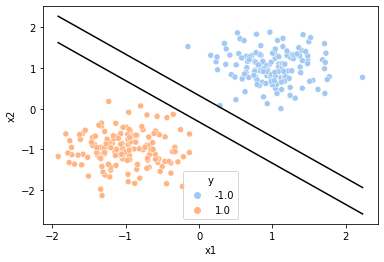

In [277]:
perceptron_neuron.show_result(perceptron_train_data)

# 2.3

In [278]:
print('Test accuracy is: {}%'.format(perceptron_neuron.test() * 100))

Test accuracy is: 100.0%


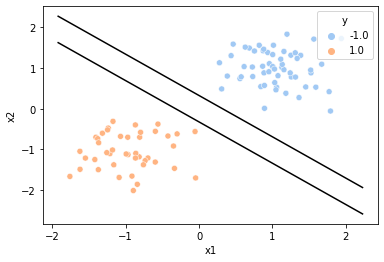

In [279]:
perceptron_neuron.show_result(perceptron_test_data)

# 2.4

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 2 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 0 errors >>>...
...<<< accuracy is: 100 >>>...
Test accuracy is: 100.0%


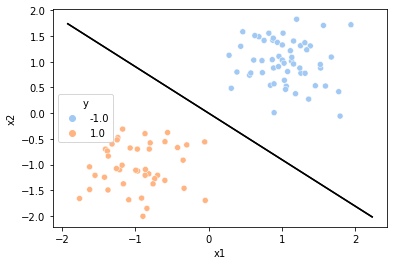

In [281]:
perceptron_neuron.reset(0)
perceptron_neuron.train()
perceptron_neuron.show_result(perceptron_test_data)
print('Test accuracy is: {}%'.format(perceptron_neuron.test() * 100))

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 11 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 3 errors >>>...
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 2 errors >>>...
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 2 errors >>>...
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 2 errors >>>...
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 2 errors >>>...
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 2 errors >>>...
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 1 errors >>>...
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 2 errors >>>...
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 2 errors >>>...
...<<< accuracy is: 99 >>>...
Test accuracy is: 99.0%


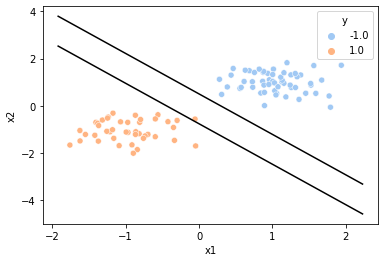

In [283]:
perceptron_neuron.reset(0.5)
perceptron_neuron.train()
perceptron_neuron.show_result(perceptron_test_data)
print('Test accuracy is: {}%'.format(perceptron_neuron.test() * 100))

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 16 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 3 errors >>>...
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 4 errors >>>...
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 3 errors >>>...
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 2 errors >>>...
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 2 errors >>>...
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 2 errors >>>...
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 2 errors >>>...
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 2 errors >>>...
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 2 errors >>>...
...<<< accuracy is: 99 >>>...
Test accuracy is: 99.0%


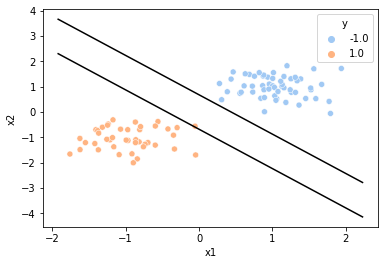

In [288]:
perceptron_neuron.reset(0.8)
perceptron_neuron.train()
perceptron_neuron.show_result(perceptron_test_data)
print('Test accuracy is: {}%'.format(perceptron_neuron.test() * 100))

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 16 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 3 errors >>>...
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 4 errors >>>...
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 3 errors >>>...
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 2 errors >>>...
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 2 errors >>>...
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 2 errors >>>...
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 2 errors >>>...
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 2 errors >>>...
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 2 errors >>>...
...<<< epoch 10 started >>>...
...<<< epoch 10 ended with 1 errors >>>...
...<<< epoch 11 started >>>...
...<<< epoch 11 ended with 2 errors >>>...
...<<< epoch 12 started >>>...
...<<< epoch 12 ended with 2 errors >>>...
...<<< epoch 13 started >>>...
...<<< epoch 13 ended with

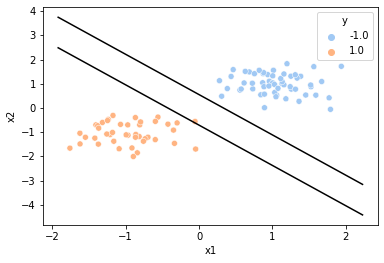

In [293]:
perceptron_neuron.reset(0.8)
perceptron_neuron.train(100)
perceptron_neuron.show_result(perceptron_test_data)
print('Test accuracy is: {}%'.format(perceptron_neuron.test() * 100))

# **3 - Adaline**

# 3.2

In [294]:
adaline_raw_data1 = pd.DataFrame()
adaline1_class1 = np.array([np.random.normal(1, 0.5, 1000), np.random.normal(1, 0.5, 1000), np.ones(1000)])
adaline1_class2 = np.array([np.random.normal(-1, 0.5, 10), np.random.normal(-1, 0.5, 10), -np.ones(10)])
adaline1 = np.concatenate((adaline1_class1, adaline1_class2),axis=1)
adaline1 = adaline1.T
np.random.shuffle(adaline1)
adaline_raw_data1['x1'] = adaline1.T[0]
adaline_raw_data1['x2'] = adaline1.T[1]
adaline_raw_data1['y'] = adaline1.T[2]

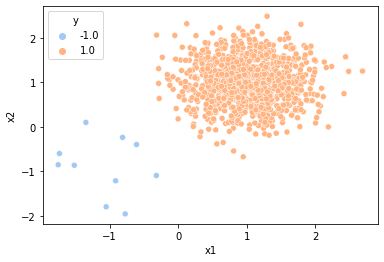

In [295]:
sns.scatterplot(data=adaline_raw_data1, x='x1', y='x2', hue='y', palette='pastel')

In [325]:
adaline_raw_data2 = pd.DataFrame()
adaline2_class1 = np.array([np.random.normal(1, 0.5, 100), np.random.normal(1, 0.5, 100), np.ones(100)])
adaline2_class2 = np.array([np.random.normal(-1, 0.5, 100), np.random.normal(-1, 0.5, 100), -np.ones(100)])
adaline2 = np.concatenate((adaline2_class1, adaline2_class2),axis=1)
adaline2 = adaline2.T
np.random.shuffle(adaline2)
adaline_raw_data2['x1'] = adaline2.T[0]
adaline_raw_data2['x2'] = adaline2.T[1]
adaline_raw_data2['y'] = adaline2.T[2]

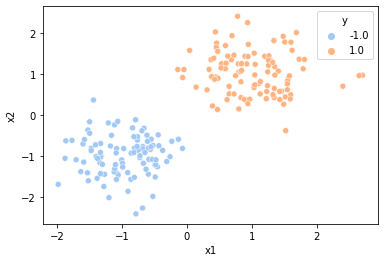

In [326]:
sns.scatterplot(data=adaline_raw_data2, x='x1', y='x2', hue='y', palette='pastel')

In [298]:
adaline1_train_inputs = adaline_raw_data1.values.T[0:2]
adaline1_train_targets = adaline_raw_data1.values.T[2]

In [299]:
def adaline_weight_updating_func(w, x, b, t, net, alpha, e):
  w += alpha * x * (t - net)
  b += alpha * (t - net)
  return w, b, 0

In [300]:
def adaline_activation_func(net, threshold=0):
  h = np.zeros(net.shape[0])
  h[net >= threshold] = 1
  h[net < -1*threshold] = -1
  return h

In [301]:
def adaline_cost_func(t, h, net):
  return 0.5 * (t - net)**2

In [302]:
def adaline_find_line_func(w, x, b, threshold=0):
  x = x[0]
  y = (threshold - b - w[0]*x)/w[1]
  return [y]

In [307]:
adaline1_neuron = Neuron(adaline1_train_inputs, 
                         adaline1_train_targets, 
                         np.array([]),
                         np.array([]),
                         adaline_activation_func, 
                         adaline_weight_updating_func, 
                         adaline_find_line_func,
                         adaline_cost_func,
                         perceptron_check_end_func,
                         threshold = 0,
                         learning_rate = 0.1,
                         random_initial = True,
                         error_threshold = 0.2)

In [310]:
adaline1_neuron.train(10)

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 10 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 10 errors >>>...
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 10 errors >>>...
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 10 errors >>>...
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 10 errors >>>...
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 10 errors >>>...
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 10 errors >>>...
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 10 errors >>>...
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 10 errors >>>...
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 10 errors >>>...
...<<< accuracy is: 99 >>>...


(array([0.17457022, 0.13751345]), 0.6454209477314058)

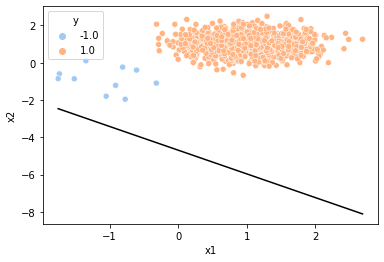

In [311]:
adaline1_neuron.show_result(adaline_raw_data1)

In [327]:
adaline2_train_inputs = adaline_raw_data2.values.T[0:2]
adaline2_train_targets = adaline_raw_data2.values.T[2]

In [328]:
adaline2_neuron = Neuron(adaline2_train_inputs, 
                         adaline2_train_targets, 
                         np.array([]),
                         np.array([]),
                         adaline_activation_func, 
                         adaline_weight_updating_func, 
                         adaline_find_line_func,
                         adaline_cost_func,
                         perceptron_check_end_func,
                         threshold = 0,
                         learning_rate = 0.1,
                         random_initial = True,
                         error_threshold = 0.2)

In [329]:
adaline2_neuron.train(10)

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 18 errors >>>...
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 14 errors >>>...
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 14 errors >>>...
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 14 errors >>>...
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 14 errors >>>...
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 14 errors >>>...
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 14 errors >>>...
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 14 errors >>>...
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 14 errors >>>...
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 14 errors >>>...
...<<< accuracy is: 93 >>>...


(array([0.4754919 , 0.41913755]), -0.1413816061416815)

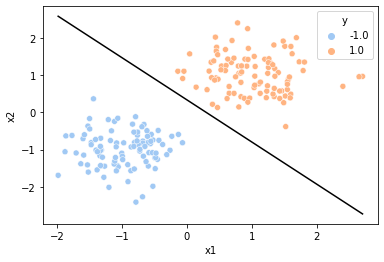

In [330]:
adaline2_neuron.show_result(adaline_raw_data2)

# **4 - Madaline**

In [331]:
Q4_FILE_PATH = '/content/drive/MyDrive/University/nn/madaline.csv'

In [613]:
madaline_file_data = pd.read_csv(Q4_FILE_PATH, header= None)
madaline_file_data.iloc[:, 2].replace({0.0: -1.0}, inplace=True)
madaline_raw_data = pd.DataFrame()
madaline_raw_data['x1'] = madaline_file_data.values.T[0]
madaline_raw_data['x2'] = madaline_file_data.values.T[1]
madaline_raw_data['y'] = madaline_file_data.values.T[2]

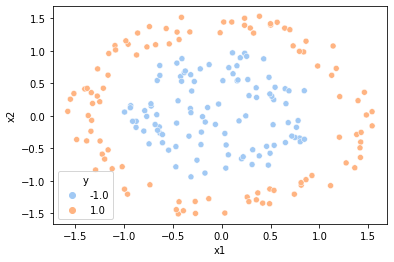

In [614]:
sns.scatterplot(data=madaline_raw_data, x='x1', y='x2', hue='y', palette='pastel')

In [615]:
madaline_inputs = madaline_raw_data.values.T[0:2]
madaline_targets = madaline_raw_data.values.T[2]

In [616]:
def madaline_weight_updating_func(w, x, b, t, net, alpha, e):
  updates_num=0
  w = w.T
  if e != 0:
    if t == 1:
      net_values = abs(net)
      i = np.argmin(net_values)
      b[i] += alpha * (1 - net[i])
      w[i] += alpha * (1 - net[i]) * x 
      updates_num += 1
    elif t == -1:
      for i in range(len(net)):
        if 0 < net[i]: 
          b[i] += alpha * (-1 - net[i])
          w[i] += alpha * (-1 - net[i]) * x 
          updates_num += 1
  return w.T, b, updates_num 

In [633]:
def madaline_check_end_func(errors_num, updates_num, update_threshold=0):
  print(updates_num)
  return updates_num <= update_threshold

In [617]:
def madaline_activation_func(z_in, threshold=0):
  z = np.zeros(z_in.shape)
  z[z_in >= threshold] = 1
  z[z_in < -threshold] = -1
  adaline_num = z_in.shape[1]
  v = [1/adaline_num] * adaline_num
  b = (adaline_num-1)/adaline_num
  y_in = np.dot(z, v) + b
  y = np.zeros(y_in.shape)
  y[y_in >= threshold] = 1
  y[y_in < -threshold] = -1
  return y

In [618]:
def madaline_find_line_func(w, x, b, threshold=0):
  x = x[0]
  y = []
  for i in range(len(w.T)):
    y.append((threshold - b[i] - w.T[i][0]*x)/w.T[i][1])
  return y

In [718]:
madaline_neuron = Neuron(madaline_inputs, 
                         madaline_targets, 
                         np.array([]),
                         np.array([]),
                         madaline_activation_func, 
                         madaline_weight_updating_func, 
                         madaline_find_line_func,
                         perceptron_cost_func,
                         madaline_check_end_func,
                         threshold = 0,
                         learning_rate = 0.01,
                         random_initial = True,
                         error_threshold = 0)

In [719]:
madaline_neuron.madaline_initial_weights(4, 750)

In [720]:
madaline_neuron.train(200)

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 109 errors >>>...
242
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 79 errors >>>...
93
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 41 errors >>>...
41
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 22 errors >>>...
24
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 11 errors >>>...
13
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 8 errors >>>...
9
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 7 errors >>>...
8
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 7 errors >>>...
7
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 6 errors >>>...
6
...<<< epoch 9 started >>>...
...<<< epoch 9 ended with 7 errors >>>...
7
...<<< epoch 10 started >>>...
...<<< epoch 10 ended with 5 errors >>>...
5
...<<< epoch 11 started >>>...
...<<< epoch 11 ended with 4 errors >>>...
4
...<<< epoch 12 started >>>...
...<<< epoch 12 ended with 4 errors >>>...
4
...<<< epoch 13 star

(array([[-0.03840593, -0.61747228,  0.80415854,  0.06086794],
        [ 0.47748771, -0.15767558,  0.96178162, -0.10084294]]),
 array([-0.47509018, -0.62012986, -1.19334366, -0.1064725 ]))

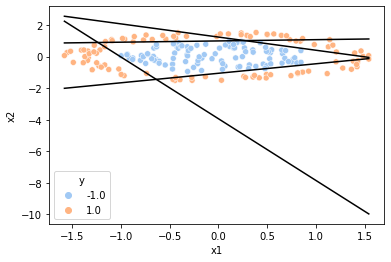

In [721]:
madaline_neuron.show_result(madaline_raw_data)

In [722]:
madaline_neuron2 = Neuron(madaline_inputs, 
                         madaline_targets, 
                         np.array([]),
                         np.array([]),
                         madaline_activation_func, 
                         madaline_weight_updating_func, 
                         madaline_find_line_func,
                         perceptron_cost_func,
                         madaline_check_end_func,
                         threshold = 0,
                         learning_rate = 0.01,
                         random_initial = True,
                         error_threshold = 0)

In [723]:
madaline_neuron2.madaline_initial_weights(6, 300)

In [724]:
madaline_neuron2.train(200)

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 100 errors >>>...
268
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 79 errors >>>...
119
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 37 errors >>>...
45
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 11 errors >>>...
11
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 4 errors >>>...
4
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 3 errors >>>...
3
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 2 errors >>>...
2
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 1 errors >>>...
1
...<<< epoch 8 started >>>...
...<<< epoch 8 ended with 0 errors >>>...
0
...<<< accuracy is: 100 >>>...


(array([[-0.804587  , -0.65769609,  0.49767052, -0.11787963,  0.07451846,
          0.89539627],
        [-0.19478471, -0.51189004, -0.48474087,  0.49603056, -0.32294803,
          0.66627156]]),
 array([-0.79072042, -0.72148779, -0.6081789 , -0.48801872, -0.70535877,
        -1.01856643]))

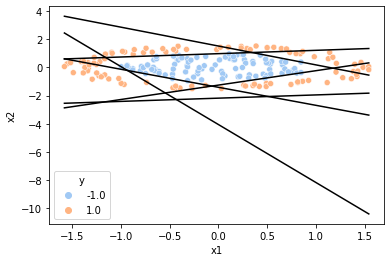

In [725]:
madaline_neuron2.show_result(madaline_raw_data)

In [726]:
madaline_neuron3 = Neuron(madaline_inputs, 
                         madaline_targets, 
                         np.array([]),
                         np.array([]),
                         madaline_activation_func, 
                         madaline_weight_updating_func, 
                         madaline_find_line_func,
                         perceptron_cost_func,
                         madaline_check_end_func,
                         threshold = 0,
                         learning_rate = 0.01,
                         random_initial = True,
                         error_threshold = 0)

In [727]:
madaline_neuron3.madaline_initial_weights(8, 300)

In [728]:
madaline_neuron3.train(200)

...<<< epoch 0 started >>>...
...<<< epoch 0 ended with 100 errors >>>...
226
...<<< epoch 1 started >>>...
...<<< epoch 1 ended with 76 errors >>>...
98
...<<< epoch 2 started >>>...
...<<< epoch 2 ended with 22 errors >>>...
30
...<<< epoch 3 started >>>...
...<<< epoch 3 ended with 9 errors >>>...
10
...<<< epoch 4 started >>>...
...<<< epoch 4 ended with 4 errors >>>...
5
...<<< epoch 5 started >>>...
...<<< epoch 5 ended with 2 errors >>>...
2
...<<< epoch 6 started >>>...
...<<< epoch 6 ended with 1 errors >>>...
1
...<<< epoch 7 started >>>...
...<<< epoch 7 ended with 0 errors >>>...
0
...<<< accuracy is: 100 >>>...


(array([[-1.13511899, -0.78703814,  0.364146  , -0.34869156,  0.07451846,
          1.46147163,  0.1698838 , -0.13518516],
        [-0.22749228, -0.5839348 , -0.38339774,  1.0841636 , -0.32294803,
          1.24182139,  0.40663951,  1.55676006]]),
 array([-1.12864343, -0.84521846, -0.47341025, -1.10244888, -1.0597605 ,
        -1.91897201, -0.44831952, -1.50707873]))

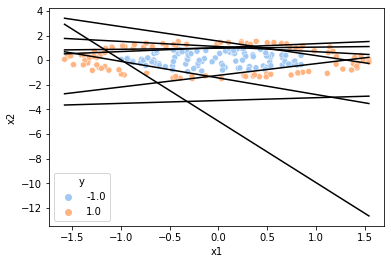

In [729]:
madaline_neuron3.show_result(madaline_raw_data)